In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#below to allow for all columns in csv to display
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Data Undestanding

## Import Cleaned Data

In [2]:
df = pd.read_csv('CustomerChurnDataQualitySolutionsImplemented12751005.csv')

In [3]:
#df

## 1.1 Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [4]:
df_training=df.sample(frac=.7)

In [5]:
df_test=df.sample(frac=.3)

## Check partitions are correct

In [6]:
df_training.shape

(700, 28)

In [7]:
df_test.shape

(300, 28)

# 1.2 Correlations and pairwise interactions

In [8]:
df_training.dtypes

age                             int64
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetentionCalls               int64
numRetentionOffersAccepted      int64
newFrequentN

In [9]:
#Select continuous and categorical features
df_training['income'] = df_training['income'].astype('object')
continuous_columns = df_training.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_training.select_dtypes(include=['bool','object']).columns
for column in categorical_columns:
    df_training[column] = df_training[column].astype('category')

In [10]:
continuous_columns

Index(['age', 'numHandsets', 'handsetAge', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers'], dtype='object')

In [11]:
df[continuous_columns].corr()

,age,numHandsets,handsetAge,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
age,1.000000,-0.031826,0.055409,-0.049863,-0.099546,-0.086614,-0.014825,0.007102,-0.018893,0.008435,-0.086306,-0.097544,-0.058644,0.059483,-0.001107,-0.045371,0.033603,-0.045532,0.023512,0.035292,-0.003682
numHandsets,-0.031826,1.000000,-0.332889,0.250042,0.283311,0.219915,0.144897,0.021034,0.012002,-0.014988,0.219437,0.267328,0.263549,0.022002,-0.069649,0.198815,0.342029,0.125814,0.139248,0.105626,0.110433
handsetAge,0.055409,-0.332889,1.000000,-0.235615,-0.300545,-0.272525,-0.118055,-0.032038,-0.012484,-0.038921,-0.239537,-0.235854,-0.200127,0.115361,0.017217,-0.207074,0.508712,-0.160692,-0.033583,-0.041720,0.028503
avgBill,-0.049863,0.250042,-0.235615,1.000000,0.739110,0.628102,0.798825,0.271562,0.032280,-0.041174,0.625931,0.496604,0.420513,0.029327,0.008424,0.441503,-0.036884,0.214989,0.045404,0.009708,-0.002851
avgMins,-0.099546,0.283311,-0.300545,0.739110,1.000000,0.562282,0.634231,0.139881,0.016085,0.020963,0.816160,0.713702,0.595358,-0.102880,-0.001677,0.552012,-0.122577,0.430256,0.021956,0.028520,-0.031689
avgrecurringCharge,-0.086614,0.219915,-0.272525,0.628102,0.562282,1.000000,0.241498,0.094962,0.041422,0.044910,0.457809,0.410675,0.332208,0.025138,-0.002711,0.304768,-0.075960,0.166599,-0.020200,0.007442,-0.044820
avgOverBundleMins,-0.014825,0.144897,-0.118055,0.798825,0.634231,0.241498,1.000000,0.137081,0.071224,0.006898,0.564397,0.396638,0.343611,-0.002165,0.031614,0.341665,-0.051218,0.150900,0.018870,-0.002998,0.011917
avgRoamCalls,0.007102,0.021034,-0.032038,0.271562,0.139881,0.094962,0.137081,1.000000,-0.103282,-0.131338,0.108020,0.060994,-0.008727,0.036653,0.038978,0.061192,0.009783,-0.012285,0.024583,-0.002911,-0.015492
callMinutesChangePct,-0.018893,0.012002,-0.012484,0.032280,0.016085,0.041422,0.071224,-0.103282,1.000000,0.670368,-0.065212,-0.037141,-0.015742,-0.006580,0.005466,-0.050097,-0.021143,0.032425,-0.050204,-0.028377,0.049874
billAmountChangePct,0.008435,-0.014988,-0.038921,-0.041174,0.020963,0.044910,0.006898,-0.131338,0.670368,1.000000,-0.017276,-0.038056,-0.009805,-0.009695,0.012987,-0.035828,-0.044235,0.021613,-0.102504,-0.062672,0.052314


It is clear that some features are correlated with one another.As such it may be a good idea to avoid including correlated features in the model since linear models rely on the assumption that features are independent[1]
[1]https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb 'Feature Selection'

In [12]:
df_training

,age,children,income,numHandsets,handsetAge,smartPhone,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
104,40,False,9,2,268,True,B,False,True,38.84,121.75,49.99,0.00,0.36,0.705,0.0232,2.70,6.00,0.67,2.367798,-0.371570,1.33,9,0.00,0,0,0,False
112,46,False,6,1,1347,False,A,False,True,48.93,517.00,37.50,43.75,0.00,-3.440,-0.9786,33.42,20.67,0.33,2.893477,-11.941595,5.00,44,0.00,1,0,0,False
460,34,False,0,8,632,True,A,True,False,36.92,375.25,44.99,5.50,0.00,1.615,0.1156,74.40,12.67,4.00,1.146537,4.398883,18.67,38,0.00,0,0,0,True
748,24,False,1,1,320,True,D,True,False,39.24,362.50,44.99,0.00,0.00,-0.790,0.0148,88.75,19.33,7.00,0.899947,9.171354,3.33,11,2.00,0,0,0,True
611,34,False,0,1,434,True,D,True,False,70.66,433.00,48.66,33.25,0.00,8.440,1.0598,14.39,9.67,1.33,1.557159,-2.152116,6.67,15,0.00,0,0,3,False
457,34,False,7,1,354,True,B,False,True,35.24,86.75,44.99,0.00,0.00,-1.415,-0.0050,0.00,0.00,0.00,0.000000,13.350303,0.00,12,0.00,0,0,0,True
504,34,False,0,1,379,True,B,True,False,34.99,246.00,44.99,0.00,0.00,0.580,0.0000,0.00,10.00,0.00,1.075269,1.587622,5.00,13,0.00,0,0,0,False
127,46,False,3,2,234,True,D,False,True,10.00,26.25,10.00,0.00,0.00,0.135,0.0000,2.37,0.00,0.00,0.538639,0.017830,1.67,23,0.00,0,0,0,False
128,34,False,0,3,101,True,E,True,False,163.11,1094.75,84.99,293.00,0.93,3.965,-0.4544,0.06,1.33,0.33,3.670000,-4.380071,0.67,19,0.00,0,0,0,True
670,34,False,0,1,393,True,D,True,False,36.84,640.75,44.99,5.25,0.00,-0.135,-0.0370,124.07,45.00,20.00,0.619112,10.977670,9.33,13,3.00,0,0,0,True


In [13]:
df_training['churn_float']=df_training['churn'].astype('float64')

In [14]:
df_training[['age','churn_float']].corr()

,age,churn_float
age,1.000000,0.040866
churn_float,0.040866,1.000000


In [15]:
corrs_with_churn={}
for i in continuous_columns:
    corrs_with_churn[i]=df_training[[i,'churn_float']].corr().as_matrix()[0,1]

In [16]:
corrs_with_churn

{'age': 0.040866121039495724,
 'avgBill': -0.026571483034042123,
 'avgDroppedCalls': -0.05345096053449026,
 'avgInCalls': 0.020471304966489662,
 'avgMins': -0.05644755120807015,
 'avgOutCalls': -0.01860163138610138,
 'avgOverBundleMins': -0.028083630775041685,
 'avgReceivedMins': -0.06801661086631815,
 'avgRoamCalls': 0.021133978092417557,
 'avgrecurringCharge': -0.03895392694418212,
 'billAmountChangePct': 0.022549068151716166,
 'callMinutesChangePct': 0.0001245421205486394,
 'handsetAge': 0.05164484996014709,
 'lastMonthCustomerCareCalls': -0.009332095182119275,
 'lifeTime': -0.051647467436367465,
 'newFrequentNumbers': -0.02684395079064769,
 'numHandsets': -0.03264611392148725,
 'numRetentionCalls': 0.05621054988349216,
 'numRetentionOffersAccepted': 0.01662365243414831,
 'peakOffPeakRatio': -0.024399073499811956,
 'peakOffPeakRatioChangePct': 0.021386699858399538}

In [17]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
#retrieving 6 largest correlations
largest_positive_correlations={}
largest_negative_correlations={}
for i in range(6):
    #retrieve 3 largest positive correlation
    largest_positive_correlations[max(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]=max(corrs_with_churn.items(),key=operator.itemgetter(1))[1]
    del corrs_with_churn[max(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]
    #retrieve 3 largest negative correlations
    largest_negative_correlations[min(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]=min(corrs_with_churn.items(),key=operator.itemgetter(1))[1]
    del corrs_with_churn[min(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]

In [18]:
largest_positive_correlations

{'age': 0.040866121039495724,
 'avgRoamCalls': 0.021133978092417557,
 'billAmountChangePct': 0.022549068151716166,
 'handsetAge': 0.05164484996014709,
 'numRetentionCalls': 0.05621054988349216,
 'peakOffPeakRatioChangePct': 0.021386699858399538}

In [19]:
largest_negative_correlations

{'avgDroppedCalls': -0.05345096053449026,
 'avgMins': -0.05644755120807015,
 'avgReceivedMins': -0.06801661086631815,
 'avgrecurringCharge': -0.03895392694418212,
 'lifeTime': -0.051647467436367465,
 'numHandsets': -0.03264611392148725}

In [20]:
df_training[['avgMins', 'churn_float']].corr().as_matrix()[0,1]

-0.05644755120807015

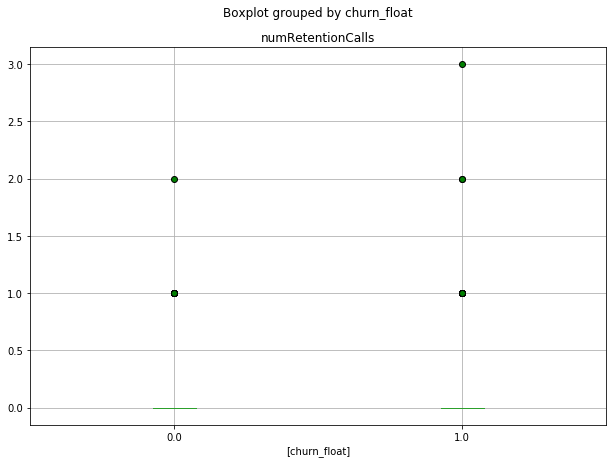

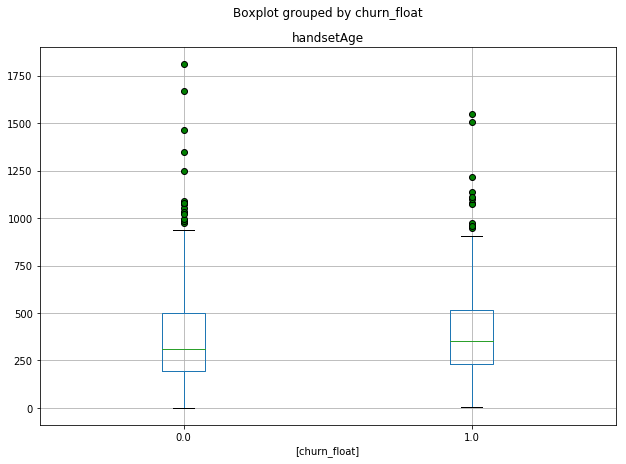

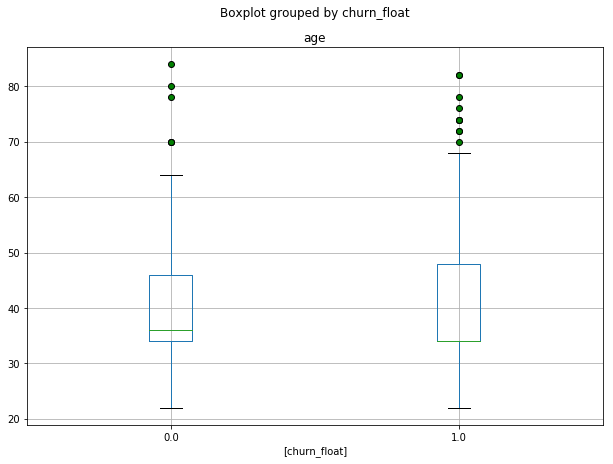

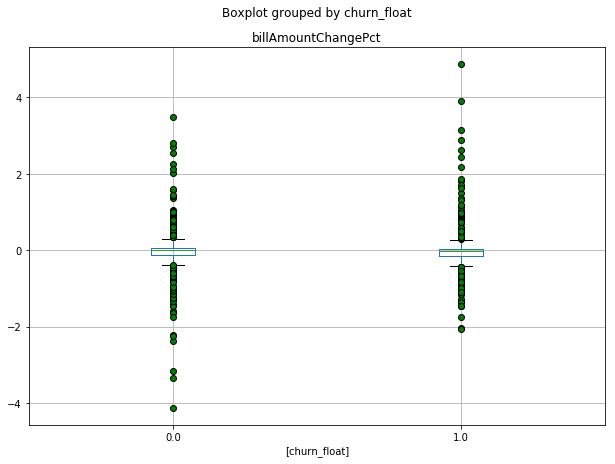

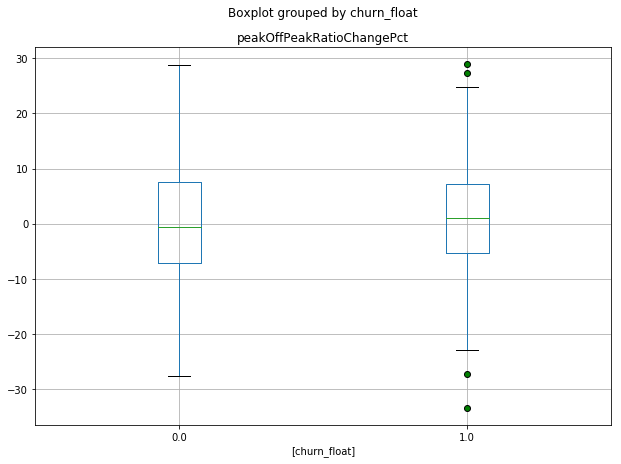

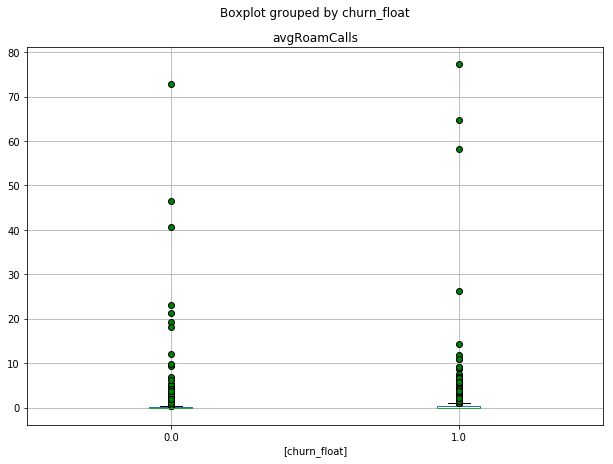

In [21]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for k in largest_positive_correlations:
    bp = df_training.boxplot(column=[k], by=['churn_float'], flierprops=flierprops, figsize=(10,7))

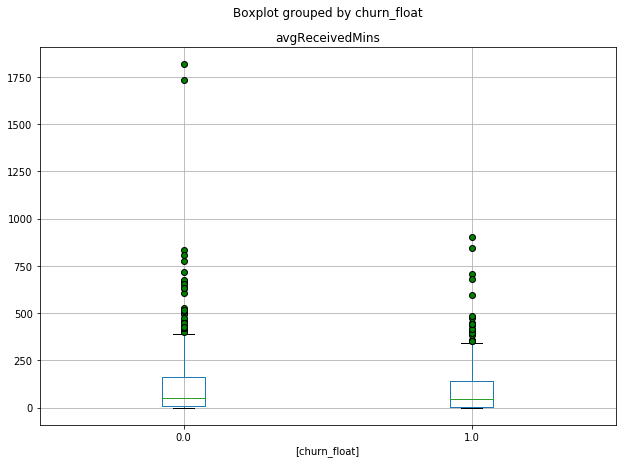

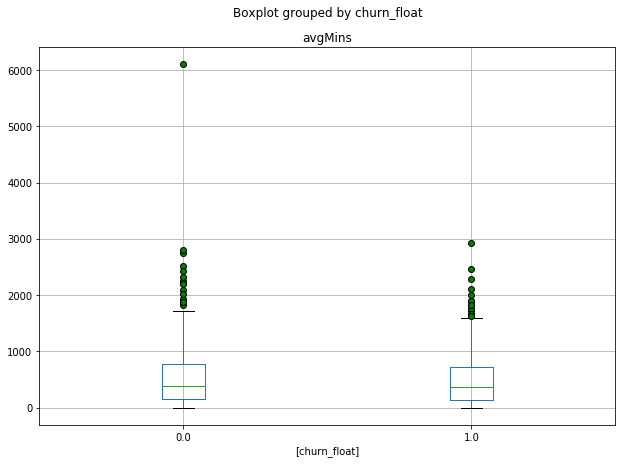

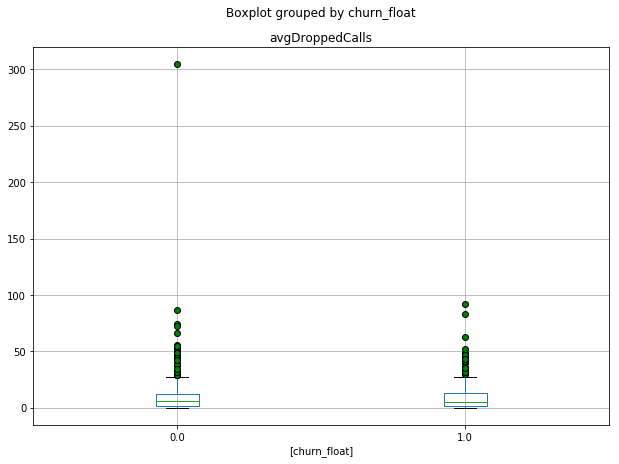

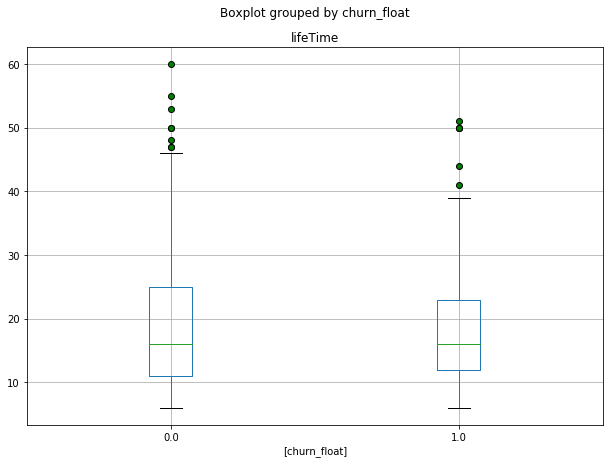

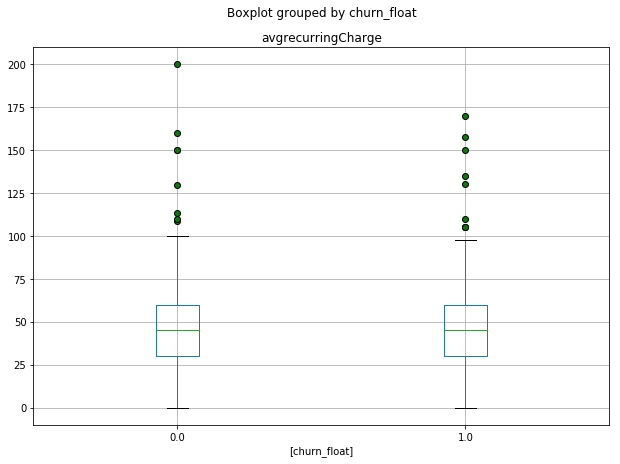

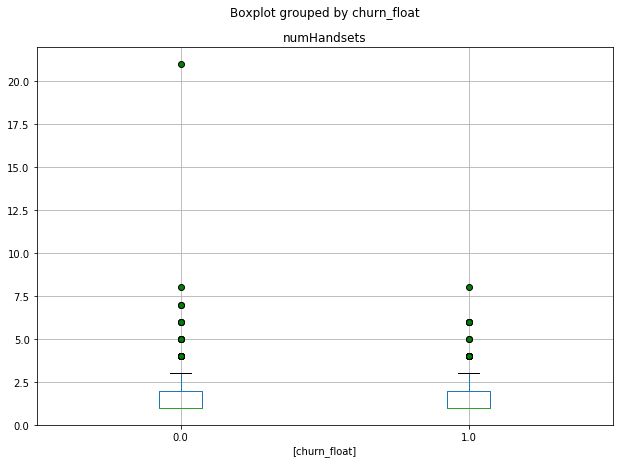

In [22]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for k in largest_negative_correlations:
    bp = df_training.boxplot(column=[k], by=['churn_float'], flierprops=flierprops, figsize=(10,7))

(0, 100)

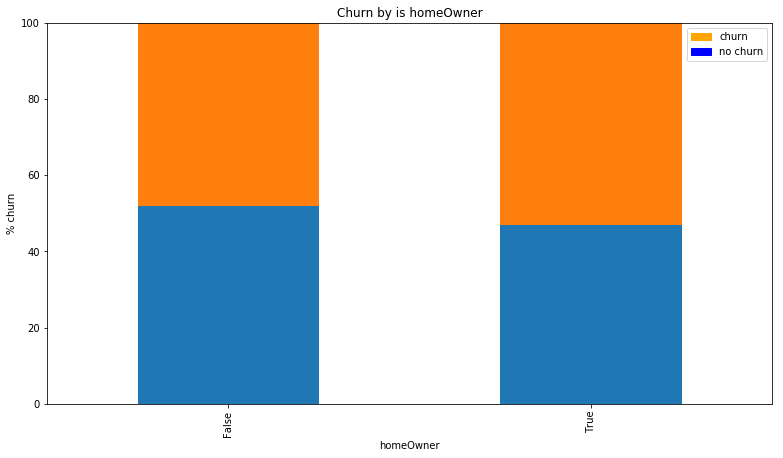

In [23]:
"""
Taken from Lab4
"""

homeOwner = 1 / df_training[df_training.homeOwner == True].count()['homeOwner']
nohomeOwner = 1 / df_training[df_training.homeOwner == False].count()['homeOwner']
df_training['percent'] = homeOwner * 100

index_list = df_training[df_training['homeOwner'] == False].index.tolist()

for i in index_list:
    df_training.loc[i, 'percent'] = nohomeOwner * 100

category_group = df_training[['percent','homeOwner','churn']].groupby(['homeOwner','churn']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by is homeOwner", figsize=(13,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [24]:
categorical_columns

Index(['children', 'income', 'smartPhone', 'creditRating', 'homeOwner', 'creditCard', 'churn'], dtype='object')

(0, 100)

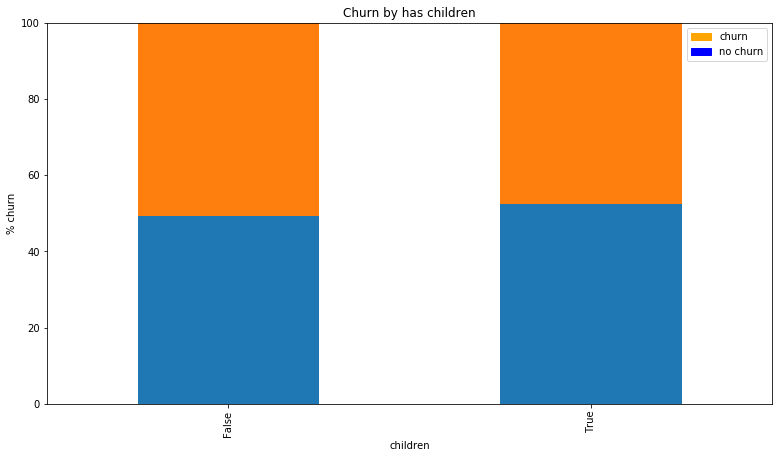

In [25]:
"""
Taken from Lab4
"""
# Count the number of customers with children
children = 1 / df_training[df_training.children == True].count()['children']

noChildren = 1 / df_training[df_training.children == False].count()['children']

# Create a new column in the dataframe called percent and insert children in all cells
df_training['percent'] = children * 100

# Find indexes of all rows containing False for children
index_list = df_training[df_training['children'] == False].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df_training.loc[i, 'percent'] = noChildren * 100

# Group dataframe by children and churn and sum precent
category_group = df_training[['percent','children','churn']].groupby(['children','churn']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has children", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("children")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

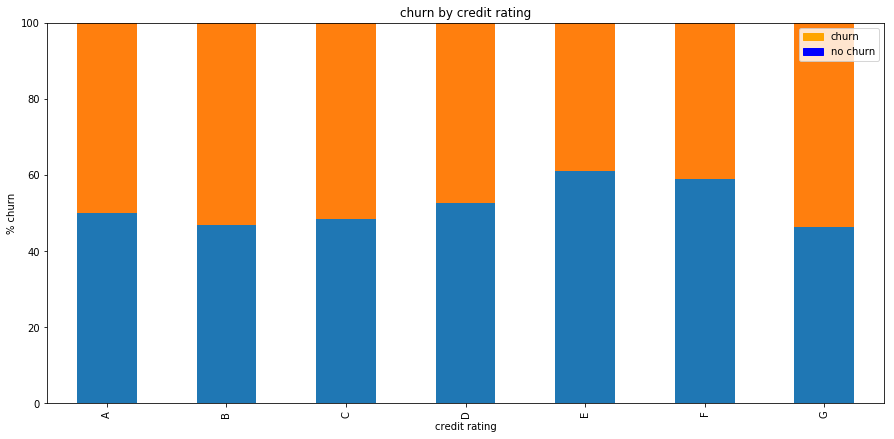

In [26]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
credit = pd.unique(df_training.creditRating.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_training['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in credit:
    count = 1 / df_training[df_training.creditRating == p].count()['churn']
    index_list = df_training[df_training['creditRating'] == p].index.tolist()
    for i in index_list:
        df_training.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_training[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by credit rating", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("credit rating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

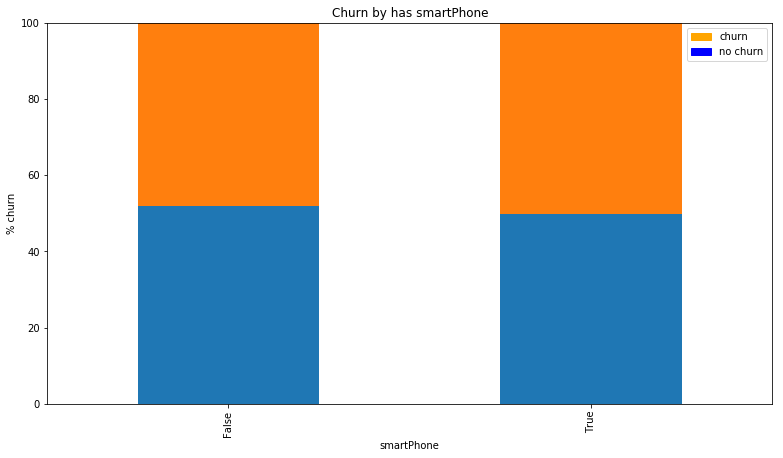

In [27]:
"""
Taken from Lab4
"""
smart_phone = 1 / df_training[df_training.smartPhone == True].count()['smartPhone']
nosmartPhone = 1 / df_training[df_training.smartPhone == False].count()['smartPhone']
df_training['percent'] = smart_phone * 100
index_list = df_training[df_training['smartPhone'] == False].index.tolist()
for i in index_list:
    df_training.loc[i, 'percent'] = nosmartPhone * 100
category_group = df_training[['percent','smartPhone','churn']].groupby(['smartPhone','churn']).sum()
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has smartPhone", figsize=(13,7))
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.set_xlabel("smartPhone")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

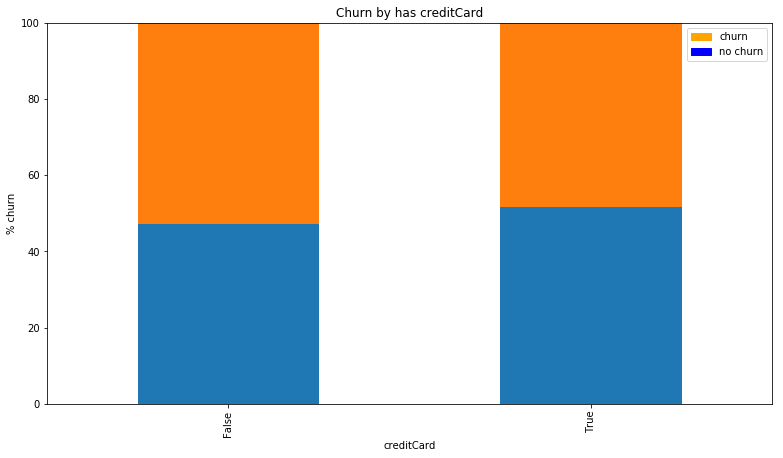

In [28]:
"""
Taken from Lab4
"""
creditCard = 1 / df_training[df_training.creditCard == True].count()['creditCard']
nocreditCard = 1 / df_training[df_training.creditCard == False].count()['creditCard']

df_training['percent'] = creditCard * 100

index_list = df_training[df_training['creditCard'] == False].index.tolist()

for i in index_list:
    df_training.loc[i, 'percent'] = nocreditCard * 100

category_group = df_training[['percent','creditCard','churn']].groupby(['creditCard','churn']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has creditCard", figsize=(13,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("creditCard")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

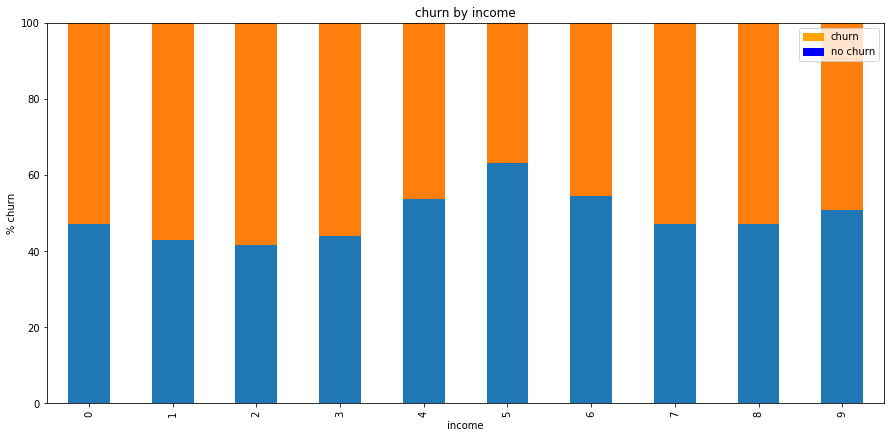

In [29]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
income = pd.unique(df_training.income.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_training['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in income:
    count = 1 / df_training[df_training.income == p].count()['churn']
    index_list = df_training[df_training['income'] == p].index.tolist()
    for i in index_list:
        df_training.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_training[['percent','income','churn']].groupby(['income','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by income", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("income")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [30]:
df_temp_credit = df_training[df_training['creditCard']==True]

df_temp_credit.shape

(459, 30)

In [31]:
df_temp_homeOwner = df_training[df_training['homeOwner']==True]

df_temp_homeOwner.shape

(264, 30)

In [32]:
df_temp_smartPhone = df_training[df_training['smartPhone']==True]

df_temp_smartPhone.shape

(625, 30)

Promising continuous features:
age, avgReceivedMins - because of all minutes measurements this is the most interesting to me. A customer who is receiving a lot of calls probably does not want to switch network since those calling them may be charged more on the new network or currently have free calls to the customer etc.
Promising categorical features:
creditCard, smartPhone, homeOwner

In [33]:
"""
From Lab 6
"""
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

In [34]:
#https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
#Handling Categorical Predictors with Two Categories
import numpy as np

In [35]:
lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgReceivedMins + avgrecurringCharge + handsetAge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge + avgReceivedMins", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner)", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ avgReceivedMins + newFrequentNumbers+lifeTime+avgOutCalls+avgInCalls + avgBill + billAmountChangePct + avgMins +avgOverBundleMins + avgRoamCalls +numRetentionCalls", data=df_training).fit()

In [36]:
continuous_columns

Index(['age', 'numHandsets', 'handsetAge', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers'], dtype='object')

In [37]:
df_training['smartPhone']

104     True
112    False
460     True
748     True
611     True
457     True
504     True
127     True
128     True
670     True
212     True
77      True
313     True
523     True
296     True
492     True
580     True
582     True
886     True
726     True
327     True
654     True
867     True
436     True
557     True
471     True
619     True
972     True
356    False
600     True
       ...  
370     True
111    False
940     True
991     True
974     True
784     True
718     True
215     True
367    False
527     True
520     True
899     True
595     True
316     True
90      True
389     True
76      True
993     True
297     True
183     True
275     True
166    False
279     True
815     True
820     True
497     True
710     True
739     True
200    False
625     True
Name: smartPhone, Length: 700, dtype: category
Categories (2, object): [False, True]

In [38]:
# Print the weights learned for each feature.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            churn_float   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.631
Date:                Sun, 01 Apr 2018   Prob (F-statistic):              0.165
Time:                        14:42:51   Log-Likelihood:                -504.78
No. Observations:                 700   AIC:                             1020.
Df Residuals:                     695   BIC:                             1042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4673 

In [39]:
# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 increase in RentalPrice.
# We can use the learned model to predict the RentalPrice for a new office Size.

# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'homeOwner': [True],'age':[46],'avgReceivedMins':[63.10]})
X_new.head()

,age,avgReceivedMins,homeOwner
0,46,63.1,True


In [40]:
df_training.head(10)

,age,children,income,numHandsets,handsetAge,smartPhone,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,churn_float,percent
104,40,False,9,2,268,True,B,False,True,38.84,121.75,49.99,0.00,0.36,0.705,0.0232,2.70,6.00,0.67,2.367798,-0.371570,1.33,9,0.0,0,0,0,False,0.0,1.639344
112,46,False,6,1,1347,False,A,False,True,48.93,517.00,37.50,43.75,0.00,-3.440,-0.9786,33.42,20.67,0.33,2.893477,-11.941595,5.00,44,0.0,1,0,0,False,0.0,0.689655
460,34,False,0,8,632,True,A,True,False,36.92,375.25,44.99,5.50,0.00,1.615,0.1156,74.40,12.67,4.00,1.146537,4.398883,18.67,38,0.0,0,0,0,True,1.0,0.523560
748,24,False,1,1,320,True,D,True,False,39.24,362.50,44.99,0.00,0.00,-0.790,0.0148,88.75,19.33,7.00,0.899947,9.171354,3.33,11,2.0,0,0,0,True,1.0,3.571429
611,34,False,0,1,434,True,D,True,False,70.66,433.00,48.66,33.25,0.00,8.440,1.0598,14.39,9.67,1.33,1.557159,-2.152116,6.67,15,0.0,0,0,3,False,0.0,0.523560
457,34,False,7,1,354,True,B,False,True,35.24,86.75,44.99,0.00,0.00,-1.415,-0.0050,0.00,0.00,0.00,0.000000,13.350303,0.00,12,0.0,0,0,0,True,1.0,1.176471
504,34,False,0,1,379,True,B,True,False,34.99,246.00,44.99,0.00,0.00,0.580,0.0000,0.00,10.00,0.00,1.075269,1.587622,5.00,13,0.0,0,0,0,False,0.0,0.523560
127,46,False,3,2,234,True,D,False,True,10.00,26.25,10.00,0.00,0.00,0.135,0.0000,2.37,0.00,0.00,0.538639,0.017830,1.67,23,0.0,0,0,0,False,0.0,2.439024
128,34,False,0,3,101,True,E,True,False,163.11,1094.75,84.99,293.00,0.93,3.965,-0.4544,0.06,1.33,0.33,3.670000,-4.380071,0.67,19,0.0,0,0,0,True,1.0,0.523560
670,34,False,0,1,393,True,D,True,False,36.84,640.75,44.99,5.25,0.00,-0.135,-0.0370,124.07,45.00,20.00,0.619112,10.977670,9.33,13,3.0,0,0,0,True,1.0,0.523560


In [41]:
lm.predict(df_training)

104    0.485736
112    0.567131
460    0.563569
748    0.536153
611    0.558062
457    0.493320
504    0.556365
127    0.485048
128    0.532189
670    0.535812
212    0.472739
77     0.551593
313    0.548265
523    0.522145
296    0.451311
492    0.464518
580    0.548189
582    0.368425
886    0.431063
726    0.491962
327    0.460547
654    0.454357
867    0.499636
436    0.547774
557    0.535014
471    0.397334
619    0.543791
972    0.546731
356    0.542456
600    0.465297
         ...   
370    0.466325
111    0.492368
940    0.510374
991    0.552547
974    0.507823
784    0.549738
718    0.486888
215    0.496153
367    0.489348
527    0.495795
520    0.532853
899    0.499803
595    0.484076
316    0.491869
90     0.516909
389    0.565190
76     0.461317
993    0.544904
297    0.567757
183    0.426880
275    0.535448
166    0.513904
279    0.471548
815    0.489614
820    0.492952
497    0.478880
710    0.486711
739    0.425529
200    0.460816
625    0.496129
Length: 700, dtype: floa

In [42]:
predict_df_train = pd.DataFrame({'ActualChurn': df_training.churn_float, 'PredictedChurn': lm.predict(df_training)})
predict_df_train

,ActualChurn,PredictedChurn
104,0.0,0.485736
112,0.0,0.567131
460,1.0,0.563569
748,1.0,0.536153
611,0.0,0.558062
457,1.0,0.493320
504,0.0,0.556365
127,0.0,0.485048
128,1.0,0.532189
670,1.0,0.535812


In [43]:
df = pd.DataFrame({'ActualChurn': predict_df_train.ActualChurn, 'PredictedChurn': predict_df_train.PredictedChurn,
                  'AbsDiff':abs(predict_df_train.ActualChurn-predict_df_train.PredictedChurn)})

In [44]:
df_test_performance = df[df['AbsDiff']<0.5]

In [45]:
df_test_performance.shape

(381, 3)

In [46]:
#Pair the actual and the predicted values
print("Actual - Predicted:\n", (df_training.churn_float - lm.predict(df_training)))
print("\n(Actual - Predicted) squared:\n", (df_training.churn_float - lm.predict(df_training))**2)

Actual - Predicted:
 104   -0.485736
112   -0.567131
460    0.436431
748    0.463847
611   -0.558062
457    0.506680
504   -0.556365
127   -0.485048
128    0.467811
670    0.464188
212   -0.472739
77    -0.551593
313   -0.548265
523    0.477855
296    0.548689
492   -0.464518
580   -0.548189
582   -0.368425
886   -0.431063
726    0.508038
327    0.539453
654   -0.454357
867    0.500364
436   -0.547774
557    0.464986
471    0.602666
619    0.456209
972    0.453269
356   -0.542456
600    0.534703
         ...   
370   -0.466325
111    0.507632
940    0.489626
991    0.447453
974   -0.507823
784   -0.549738
718   -0.486888
215    0.503847
367    0.510652
527   -0.495795
520   -0.532853
899   -0.499803
595    0.515924
316    0.508131
90     0.483091
389    0.434810
76    -0.461317
993   -0.544904
297   -0.567757
183    0.573120
275    0.464552
166    0.486096
279    0.528452
815    0.510386
820    0.507048
497   -0.478880
710   -0.486711
739   -0.425529
200    0.539184
625    0.503871
Len

In [47]:
df_test['churn_float']=df_test['churn'].astype('float64')

In [48]:
predict_df_test = pd.DataFrame({'ActualChurn': df_test.churn_float, 'PredictedChurn': lm.predict(df_test)})

In [49]:
df_perf_test = pd.DataFrame({'ActualChurn': predict_df_test.ActualChurn, 'PredictedChurn': predict_df_test.PredictedChurn,
                  'AbsDiff':abs(predict_df_test.ActualChurn-predict_df_test.PredictedChurn)})

In [50]:
df_perf_test

,AbsDiff,ActualChurn,PredictedChurn
203,0.465984,0.0,0.465984
475,0.544393,1.0,0.455607
688,0.480124,1.0,0.519876
296,0.548689,1.0,0.451311
870,0.661479,0.0,0.661479
401,0.525151,1.0,0.474849
223,0.471180,0.0,0.471180
730,0.499179,0.0,0.499179
752,0.528585,1.0,0.471415
307,0.505508,1.0,0.494492


In [51]:
df_test_performance_test = df_perf_test[df_perf_test['AbsDiff']<0.5]

In [52]:
df_test_performance_test.shape

(169, 3)

In [53]:
df_test.shape

(300, 29)

In [54]:
df_temp=df_test[df_test['churn_float']==False]

In [55]:
count_test_true=df_test[df_test['churn_float']==True]['churn'].count()

In [56]:
count_test_false=df_test[df_test['churn_float']==False]['churn'].count()

In [57]:
print(max(count_test_true,count_test_false))

161


In [58]:
df_temp.shape

(161, 29)

In [59]:
df_temp_train=df_training[df_training['churn_float']==False]

# Note: compare multiple runs of model prediction - minimal feature model vs overloaded model i.e. all promising categorical features and all high correlation continuous features

In [60]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            churn_float   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.631
Date:                Sun, 01 Apr 2018   Prob (F-statistic):              0.165
Time:                        14:42:55   Log-Likelihood:                -504.78
No. Observations:                 700   AIC:                             1020.
Df Residuals:                     695   BIC:                             1042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4673 

In [61]:
#performance on training data
df_test_performance.shape

(381, 3)

In [62]:
#performance using always say majority (max of rows or 700-rows)
df_temp_train.shape

(351, 30)

In [63]:
#performance on test data
df_test_performance_test.shape

(169, 3)

In [64]:
#performance using always say majority (max of rows or 300-rows)
df_temp.shape

(161, 29)

In [65]:
from sklearn import metrics

In [66]:
y = df_test.churn_float.as_matrix()

In [67]:
predictions = lm.predict(df_test).as_matrix()

## Thresholding predictions: over 0.5 = 1.0 less than 0.5 = 0.0

In [68]:
for i in range(len(predictions)):
        if predictions[i]>0.5:
            predictions[i]=1.0
        else:
            predictions[i]=0.0

In [69]:
print("Confusion Matrix: ",metrics.confusion_matrix(y, predictions))

print("Accuracy: ", metrics.accuracy_score(y, predictions))

print("Classification report:\n ", metrics.classification_report(y, predictions))

Confusion Matrix:  [[100  61]
 [ 70  69]]
Accuracy:  0.5633333333333334
Classification report:
               precision    recall  f1-score   support

        0.0       0.59      0.62      0.60       161
        1.0       0.53      0.50      0.51       139

avg / total       0.56      0.56      0.56       300



## Simple model: i.e. predict majority churn class

In [70]:
def simple_predict_stats(data_frame,feature='churn_float'):
    majority_class=0.0
    if data_frame[data_frame[feature]==1.0][feature].count()> data_frame[data_frame[feature]==0.0][feature].count():
        majority_class=0.0
    if majority_class==1.0:
        predictions=np.ones(shape=data_frame.shape[0])
    else:
        predictions=np.zeros(shape=data_frame.shape[0])
    return predictions
    
    

In [71]:
print("Confusion Matrix: ",metrics.confusion_matrix(y, simple_predict_stats(df_test)))

print("Accuracy: ", metrics.accuracy_score(y, simple_predict_stats(df_test)))

print("Classification report:\n ", metrics.classification_report(y, simple_predict_stats(df_test)))

Confusion Matrix:  [[161   0]
 [139   0]]
Accuracy:  0.5366666666666666
Classification report:
               precision    recall  f1-score   support

        0.0       0.54      1.00      0.70       161
        1.0       0.00      0.00      0.00       139

avg / total       0.29      0.54      0.37       300



/home/robbie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
simple_predict_stats(df_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [73]:
largest_positive_correlations

{'age': 0.040866121039495724,
 'avgRoamCalls': 0.021133978092417557,
 'billAmountChangePct': 0.022549068151716166,
 'handsetAge': 0.05164484996014709,
 'numRetentionCalls': 0.05621054988349216,
 'peakOffPeakRatioChangePct': 0.021386699858399538}

In [74]:
largest_negative_correlations

{'avgDroppedCalls': -0.05345096053449026,
 'avgMins': -0.05644755120807015,
 'avgReceivedMins': -0.06801661086631815,
 'avgrecurringCharge': -0.03895392694418212,
 'lifeTime': -0.051647467436367465,
 'numHandsets': -0.03264611392148725}

C(homeOwner)[T.True]   
avgrecurringCharge      
avgReceivedMins
Seems to be best combination so far

In [ ]:
import seaborn as sns

In [ ]:
df_training[df_training['churn'] == True][['lastMonthCustomerCareCalls']].hist(figsize=(7,7), bins=40)
df_training[df_training['churn'] == False][['lastMonthCustomerCareCalls']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9b5aa860>]],
      dtype=object)

In [ ]:
df_dummyt = df_training[(df_training['lastMonthCustomerCareCalls']>15)&(df_training['churn']==True)]

In [ ]:
df_dummyf = df_training[(df_training['lastMonthCustomerCareCalls']>15)&(df_training['churn']==False)]

In [ ]:
df_dummyt.shape

In [ ]:
df_dummyf.shape